<a href="https://colab.research.google.com/github/Almabetter-account/REGRESSION-CAPSTONE-PROJECT/blob/main/ML_Regression_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
#Load the dataset
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine learning/linear regression/energy.csv')

In [27]:
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
dataset.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
dataset.shape

(19735, 29)

In [ ]:
pd.isnull("dataset")

False

In [ ]:
dataset.duplicated().sum()

0

In [33]:
new_data=dataset.drop(['date','lights'],axis=1)


In [41]:
target_var='Appliances'


In [43]:
independent_variables = list(set(dataset.columns.tolist()) - {target_var})
print(independent_variables)


['T2', 'Tdewpoint', 'Windspeed', 'T9', 'T1', 'RH_1', 'RH_8', 'RH_7', 'RH_6', 'RH_2', 'T4', 'T_out', 'T8', 'T3', 'date', 'rv2', 'RH_3', 'RH_out', 'T5', 'Visibility', 'Press_mm_hg', 'lights', 'RH_5', 'RH_9', 'T7', 'T6', 'RH_4', 'rv1']


In [59]:
#create data of independent variables
X=dataset[independent_variables].values
#create data of target variable
Y=dataset[target_var].values

array([[19.2, 5.3, 7.0, ..., 7.026666666666671, 45.5666666666667,
        13.275433157104999],
       [19.2, 5.2, 6.6666666666666705, ..., 6.8333333333333295, 45.9925,
        18.606194981839508],
       [19.2, 5.1, 6.3333333333333295, ..., 6.56, 45.89,
        28.64266816759482],
       ...,
       [25.6285714285714, 13.266666666666698, 3.6666666666666705, ...,
        23.6266666666667, 45.73, 29.19911708449945],
       [25.414, 13.233333333333302, 3.8333333333333295, ...,
        22.433333333333298, 45.79, 6.322783650830388],
       [25.264285714285695, 13.2, 4.0, ..., 21.0266666666667,
        45.9633333333333, 34.11885058740153]], dtype=object)

In [53]:
target_df=pd.DataFrame(Y)
independent_df=pd.DataFrame(X)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed7a95e8d0>]],
      dtype=object)

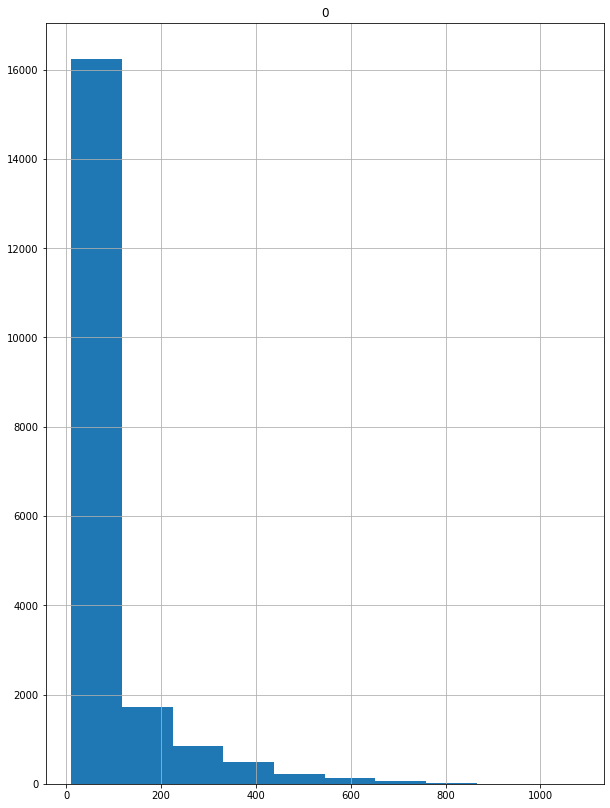

In [57]:
target_df.hist(bins=10,figsize=(10,14))

In [60]:
dataset[independent_variables]

,T2,Tdewpoint,Windspeed,T9,T1,RH_1,RH_8,RH_7,RH_6,RH_2,T4,T_out,T8,T3,date,rv2,RH_3,RH_out,T5,Visibility,Press_mm_hg,lights,RH_5,RH_9,T7,T6,RH_4,rv1
0,19.200000,5.300000,7.000000,17.033333,19.890000,47.596667,48.900000,41.626667,84.256667,44.790000,19.000000,6.600000,18.2000,19.790000,2016-01-11 17:00:00,13.275433,44.730000,92.000000,17.166667,63.000000,733.5,30,55.200000,45.5300,17.200000,7.026667,45.566667,13.275433
1,19.200000,5.200000,6.666667,17.066667,19.890000,46.693333,48.863333,41.560000,84.063333,44.722500,19.000000,6.483333,18.2000,19.790000,2016-01-11 17:10:00,18.606195,44.790000,92.000000,17.166667,59.166667,733.6,30,55.200000,45.5600,17.200000,6.833333,45.992500,18.606195
2,19.200000,5.100000,6.333333,17.000000,19.890000,46.300000,48.730000,41.433333,83.156667,44.626667,18.926667,6.366667,18.2000,19.790000,2016-01-11 17:20:00,28.642668,44.933333,92.000000,17.166667,55.333333,733.7,30,55.090000,45.5000,17.200000,6.560000,45.890000,28.642668
3,19.200000,5.000000,6.000000,17.000000,19.890000,46.066667,48.590000,41.290000,83.423333,44.590000,18.890000,6.250000,18.1000,19.790000,2016-01-11 17:30:00,45.410389,45.000000,92.000000,17.166667,51.500000,733.8,40,55.090000,45.4000,17.133333,6.433333,45.723333,45.410389
4,19.200000,4.900000,5.666667,17.000000,19.890000,46.333333,48.590000,41.230000,84.893333,44.530000,18.890000,6.133333,18.1000,19.790000,2016-01-11 17:40:00,10.084097,45.000000,92.000000,17.200000,47.666667,733.9,40,55.090000,45.4000,17.200000,6.366667,45.530000,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,25.890000,13.333333,3.333333,23.200000,25.566667,46.560000,50.074000,44.500000,1.000000,42.025714,24.700000,22.733333,24.7000,27.200000,2016-05-27 17:20:00,43.096812,41.163333,55.666667,23.200000,23.666667,755.2,0,52.400000,46.7900,24.500000,24.796667,45.590000,43.096812
19731,25.754000,13.300000,3.500000,23.200000,25.500000,46.500000,49.790000,44.414286,1.000000,42.080000,24.700000,22.600000,24.7000,27.133333,2016-05-27 17:30:00,49.282940,41.223333,56.000000,23.230000,24.500000,755.2,0,52.326667,46.7900,24.557143,24.196667,45.590000,49.282940
19732,25.628571,13.266667,3.666667,23.200000,25.500000,46.596667,49.660000,44.400000,1.000000,42.768571,24.700000,22.466667,24.7000,27.050000,2016-05-27 17:40:00,29.199117,41.690000,56.333333,23.230000,25.333333,755.2,10,52.266667,46.7900,24.540000,23.626667,45.730000,29.199117
19733,25.414000,13.233333,3.833333,23.200000,25.500000,46.990000,49.518750,44.295714,1.000000,43.036000,24.700000,22.333333,24.6625,26.890000,2016-05-27 17:50:00,6.322784,41.290000,56.666667,23.200000,26.166667,755.2,10,52.200000,46.8175,24.500000,22.433333,45.790000,6.322784


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed77017110>,
      dtype=object)

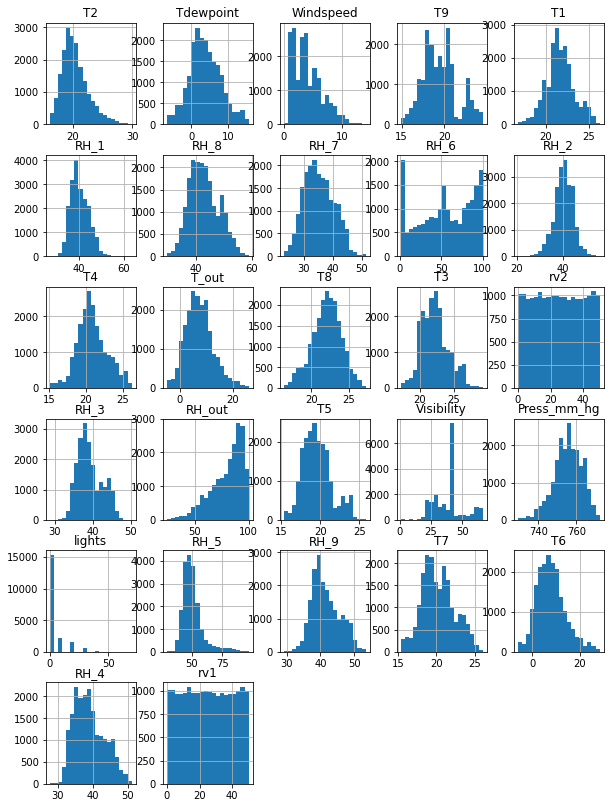

In [73]:
dataset[independent_variables].hist(bins=20,figsize=(10,14))